# **TRAVAIL PRATIQUE 4 : métaheuristiques de population PVC**


**Nom d'équipe : Equipe2**

**Membres d'équipe :**
1. Djelloul Oussama ***C.E***
2. Kedadsa Islam Chakib
3. Messar Cylia
4. Tagzirt Elissa
5. Sadi Lina
6. Bousba Neda
7. Tihami Mohamed Hicham

**Groupe : *SIQ1***

**Problème : *Voyageur de commerce***



----



# **EXPLICATION DES SOLUTIONS**

## ACO

### **Solution 1 : ACO simple**


Voici une description détaillée des différentes étapes de l'implémentation de l'algorithme ACO fournie :

* **Initialisation des phéromones** : La fonction initialize_pheromones initialise une matrice de phéromones de taille num_cities x num_cities avec une valeur initiale v_init.

* **Algorithme ACO** :

 1. Itérations : L'algorithme effectue un certain nombre d'itérations déterminé par num_iterations.

 2. Initialisation locale des phéromones : Pour chaque itération, une matrice locale de phéromones pheromones_local est initialisée avec des valeurs nulles.
 3. Parcours des fourmis : Pour chaque fourmi dans num_ants, un parcours est effectué.
 4. Choix initial de la ville : Une ville de départ est choisie aléatoirement.
 5. Construction du chemin : La fourmi parcourt les villes restantes en choisissant la prochaine ville à visiter en fonction de probabilités calculées à partir des phéromones et des distances entre les villes.
 6. Mise à jour du chemin et des visites : Le chemin est mis à jour avec la ville choisie, et la ville est ajoutée à l'ensemble des villes visitées.
 7. Calcul de la distance du chemin parcouru : Une fois que toutes les villes ont été visitées, la distance totale du chemin est calculée.
 8. Mise à jour de la meilleure solution : Si la distance de ce chemin est meilleure que celle de la meilleure solution actuelle, la meilleure solution est mise à jour.
 9. Mise à jour des phéromones locales : Les phéromones locales sont mises à jour en fonction de la qualité du chemin parcouru par la fourmi.
 10. Mise à jour globale des phéromones : Une fois que toutes les fourmis ont terminé leur parcours, les phéromones globales sont mises à jour en combinant les phéromones locales et en appliquant un taux d'évaporation.

### **Solution 2 : Variante AS et Elitisme**


Dans cette version modifiée de l'algorithme ACO, nous avons ajouté une stratégie appelée "Élitisme", où la meilleure solution trouvée parmi toutes les fourmis lors d'une itération est privilégiée dans la mise à jour des phéromones locales.

Voici un résumé des modifications apportées :

* **Initialisation de variables** : Une variable best_ant_tour est introduite pour stocker le meilleur parcours trouvé parmi toutes les fourmis lors d'une itération, ainsi que sa distance (best_ant_distance).
* **Boucle des fourmis** :
 * Après la construction de chaque parcours par une fourmi, on vérifie si ce parcours est meilleur que le meilleur parcours actuel (best_ant_distance).
 * Si c'est le cas, le meilleur parcours est mis à jour avec le parcours de la fourmi actuelle.
* **Mise à jour des phéromones locales** : Après la construction de tous les parcours par les fourmis, les phéromones locales sont mises à jour normalement en incluant une 2eme fois le meilleur parcours trouvé (best_ant_tour).
* **Évaporation et mise à jour globale des phéromones** : Les phéromones locales sont ensuite combinées avec les phéromones globales, en appliquant le taux d'évaporation.

### **Solution 3 : MMAS**

Dans cette version améliorée de l'algorithme ACO : MIN-MAX Ant System, nous avons introduit une fonctionnalité pour réguler les niveaux de phéromones déposés en utilisant des valeurs minimales et maximales, définies respectivement comme min_pheromone et max_pheromone. De plus, lors de chaque itération, seule la fourmi ayant trouvé le meilleur chemin met à jour les pistes de phéromone.

## AG

### **Solution 1 :selection par Tournoi avec 2-opt**


> L'algorithme génétique (AG) est une méthode d'optimisation bio-inspirée qui simule le processus de sélection naturelle pour résoudre le problème du voyageur de commerce, qui consiste à trouver le chemin le plus court passant par toutes les villes et retournant à l'origine. Voici les étapes clés de notre AG:


>


1.   **Initialisation :** Création d'une population initiale d'itinéraires aléatoires,chaque itinéraire étant une permutation des villes.

2.   **Évaluation :**  Calcul de la fitness de chaque itinéraire, définie comme l'inverse de la distance totale du parcours.

3. **Sélection :** Sélection des itinéraires pour la reproduction, généralement via un tournoi basé sur la fitness.

4. **Croisement :** Application du croisement (adaptatif entre croisement à un point et PMX) pour générer de nouveaux itinéraires.

5. **Mutation :** Introduction de mutations aléatoires pour diversifier les itinéraires.

6. **Optimisation Locale :** Amélioration des itinéraires via la méthode 2-opt pour optimiser localement chaque parcours.

7. **Sélection Élitiste :** Conservation des meilleurs itinéraires de chaque génération pour garantir la qualité.

8. **Renouvellement de la Population :** Remplacement de la population par les nouveaux itinéraires générés.

9. **Répétition :** Les étapes 3 à 8 sont répétées pour un nombre déterminé de générations ou jusqu'à ce que la convergence soit atteinte.

10. **Extraction de la Solution :** L'itinéraire avec la meilleure fitness à la fin des générations est sélectionné comme la solution optimale.



> La réussite de l'algorithme génétique pour résoudre le problème du voyageur de commerce repose fortement sur un choix approprié des paramètres. La taille de la population, les taux de croisement et de mutation, et le nombre de générations doivent être soigneusement ajustés pour équilibrer exploration et exploitation, éviter la stagnation précoce, et garantir une convergence efficace vers la meilleure solution possible. Un réglage précis de ces paramètres est donc crucial pour optimiser les performances de l'algorithme.



### **Solution 2 :**

EXPLICATION SOUTION 1

### **Solution 3 :Selection par Rang**

 un algorithme génétique avec sélection par rang sélectionne les parents en fonction du classement de leur performance dans la population, favorisant ainsi les individus les plus performants pour la reproduction. Ce processus itératif de sélection, reproduction, et mutation permet d'explorer efficacement l'espace des solutions et d'optimiser les solutions au fil du temps.

# **IMPLEMENTATION**

## Lecture de fichier

XML

In [ ]:
import xml.etree.ElementTree as ET
import numpy as np

def read_tsp_xml(filename):
    # Parse XML file
    tree = ET.parse(filename)
    root = tree.getroot()

    # Find all vertices in the XML
    vertices = root.findall('.//vertex')

    # Determine the number of vertices
    num_vertices = len(vertices)

    # Initialize adjacency matrix
    adj_matrix = np.zeros((num_vertices, num_vertices))

    # Extract edge information and construct adjacency matrix
    for vertex_index, vertex in enumerate(vertices):
        edges = vertex.findall('edge')
        for edge in edges:
            neighbor_index = int(edge.text)  # Extract the neighbor vertex index
            cost = float(edge.attrib['cost'])  # Extract the cost of the edge
            adj_matrix[vertex_index][neighbor_index] = cost

    return adj_matrix


TSP

In [ ]:
import math
import time
def calculate_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def read_tsp_file(file_path):
    coordinates = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        node_coord_section_index = lines.index('NODE_COORD_SECTION\n')
        for line in lines[node_coord_section_index + 1:]:
            if line.strip() == 'EOF':
                break
            parts = line.strip().split()
            node_id = int(parts[0])
            x, y = map(float, parts[1:])
            coordinates[node_id] = (x, y)
    return coordinates


def create_distance_matrix(coordinates):
    num_cities = len(coordinates)
    distance_matrix = [[0] * num_cities for _ in range(num_cities)]

    for i in range(1, num_cities + 1):
        for j in range(1, num_cities + 1):
            distance_matrix[i - 1][j - 1] = calculate_distance(coordinates[i], coordinates[j])

    return distance_matrix

# Example usage
file_path = "eil101.tsp"
coordinates = read_tsp_file(file_path)
cities = create_distance_matrix(coordinates)


## SOLUTIONS ACO

### **Solution 1 : ACO simple**

In [ ]:
import random

# Fonction pour calculer la longueur du chemin
def tour_length(tour, distances):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distances[tour[i]][tour[i+1]]
    return total_distance

# Fonction pour initialiser les phéromones sur chaque chemin
def initialize_pheromones(num_cities,v_init):
    pheromones = [[v_init] * num_cities for _ in range(num_cities)]
    return pheromones

# Algorithme ACO
def ant_colony_optimization(distances, num_ants, num_iterations,pheromones, alpha, beta, Q, evaporation_rate):
    num_cities = len(distances)
    best_solution = None
    best_distance = float('inf')

    for _ in range(num_iterations):
        pheromones_local= initialize_pheromones(num_cities, 0.0)
        for ant in range(num_ants):
            current_city = random.randint(0, num_cities - 1)
            tour = [current_city]
            visited = {current_city}

            while len(visited) < num_cities:
                probabilities = []
                total_pheromone = sum(pheromones[current_city][neighbor] ** alpha * (1 / distances[current_city][neighbor]) ** beta for neighbor in range(num_cities) if neighbor not in visited)
                for neighbor in range(num_cities):
                    if neighbor not in visited:
                        pheromone = pheromones[current_city][neighbor]
                        probability = (pheromone ** alpha) * ((1 / distances[current_city][neighbor]) ** beta) / total_pheromone
                        probabilities.append((neighbor, probability))

                next_city = random.choices([neighbor for neighbor, _ in probabilities], [prob for _, prob in probabilities])[0]
                tour.append(next_city)
                visited.add(next_city)
                current_city = next_city

            tour.append(tour[0])
            tour_dist = tour_length(tour, distances)

            if tour_dist < best_distance:
                best_solution = tour
                best_distance = tour_dist

            for i in range(len(tour) - 1):
                pheromones_local[tour[i]][tour[i+1]] += Q / tour_dist

        for i in range(num_cities):
            for j in range(num_cities):
                pheromones[i][j] = (1 - evaporation_rate) * pheromones[i][j] + pheromones_local[i][j]

    return best_solution, best_distance

# Exemple d'utilisation
"""
distances = [
    [0, 10, 15, 20, 25],
    [10, 0, 35, 25, 30],
    [15, 35, 0, 15, 10],
    [20, 25, 15, 0, 5],
    [25, 30, 10, 5, 0]
]
"""
num_cities = len(distances)


num_ants = 75
num_iterations = 15
pheromones = initialize_pheromones(num_cities, 0.3)
alpha = 5.0
beta = 3.0
Q = 1
evaporation_rate = 0.2

best_solution, best_distance = ant_colony_optimization(distances, num_ants, num_iterations, pheromones, alpha, beta, Q, evaporation_rate)
print("Meilleure solution trouvée:", best_solution)
print("Longueur du meilleur chemin:", best_distance)

### **Solution 2 :Variante AS et Elitisme**

In [ ]:
import random

# Fonction pour calculer la longueur du chemin
def tour_length(tour, distances):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distances[tour[i]][tour[i+1]]
    return total_distance

# Fonction pour initialiser les phéromones sur chaque chemin
def initialize_pheromones(num_cities,v_init):
    pheromones = [[v_init] * num_cities for _ in range(num_cities)]
    return pheromones

# Algorithme ACO
def ant_colony_optimization(distances, num_ants, num_iterations,pheromones, alpha, beta, Q, evaporation_rate):
    num_cities = len(distances)
    best_solution = None
    best_distance = float('inf')

    for _ in range(num_iterations):
        pheromones_local= initialize_pheromones(num_cities, 0.0)
        #ant_solutions=[]   #Solution 2
        best_ant_tour = None
        best_ant_distance = float('inf')

        for ant in range(num_ants):
            current_city = random.randint(0, num_cities - 1)
            tour = [current_city]
            visited = {current_city}

            while len(visited) < num_cities:
                probabilities = []
                total_pheromone = sum(pheromones[current_city][neighbor] ** alpha * (1 / distances[current_city][neighbor]) ** beta for neighbor in range(num_cities) if neighbor not in visited)
                for neighbor in range(num_cities):
                    if neighbor not in visited:
                        pheromone = pheromones[current_city][neighbor]
                        probability = (pheromone ** alpha) * ((1 / distances[current_city][neighbor]) ** beta) / total_pheromone
                        probabilities.append((neighbor, probability))

                next_city = random.choices([neighbor for neighbor, _ in probabilities], [prob for _, prob in probabilities])[0]
                tour.append(next_city)
                visited.add(next_city)
                current_city = next_city

            tour.append(tour[0])
            tour_dist = tour_length(tour, distances)

            if tour_dist < best_distance:
                best_solution = tour
                best_distance = tour_dist

            if tour_dist < best_ant_distance :
                best_ant_distance = tour_dist
                best_ant_tour = tour

            #ant_solutions.append((tour, tour_dist))       #Solution 2

            for i in range(len(tour) - 1):
                pheromones_local[tour[i]][tour[i+1]] += Q / tour_dist

        #best_ant_tour, best_ant_distance = min(ant_solutions, key=lambda x: x[1])        #Solution 2
        for i in range(len(best_ant_tour) - 1):
            pheromones_local[best_ant_tour[i]][best_ant_tour[i+1]] += Q / best_ant_distance

        for i in range(num_cities):
            for j in range(num_cities):
                pheromones[i][j] = (1 - evaporation_rate) * pheromones[i][j] + pheromones_local[i][j]
    #print(pheromones)

    return best_solution, best_distance

# Exemple d'utilisation
"""
distances = [
    [0, 10, 15, 20, 25],
    [10, 0, 35, 25, 30],
    [15, 35, 0, 15, 10],
    [20, 25, 15, 0, 5],
    [25, 30, 10, 5, 0]
]
"""
num_cities = len(distances)


num_ants = 75
num_iterations = 15
pheromones = initialize_pheromones(num_cities, 0.3)
alpha = 5.0
beta = 4.0
Q = 1
evaporation_rate = 0.2

best_solution, best_distance = ant_colony_optimization(distances, num_ants, num_iterations, pheromones, alpha, beta, Q, evaporation_rate)
print("Meilleure solution trouvée:", best_solution)
print("Longueur du meilleur chemin:", best_distance)

### **Solution 3 :MMAS**

In [ ]:
import numpy as np

class MMAS:
    def __init__(self, num_nodes, num_ants, max_iter, alpha, beta, rho, q, tau_min, tau_max):
        # Initialisation des paramètres de l'algorithme
        self.num_nodes = num_nodes  # Nombre de villes
        self.num_ants = num_ants  # Nombre de fourmis
        self.max_iter = max_iter  # Nombre maximal d'itérations
        self.alpha = alpha  # Importance de la phéromone
        self.beta = beta  # Importance de l'heuristique
        self.rho = rho  # Taux d'évaporation de la phéromone
        self.q = q  # Quantité de phéromone déposée
        self.tau_min = tau_min  # Limite inférieure de la phéromone
        self.tau_max = tau_max  # Limite supérieure de la phéromone

        # Initialisation de la meilleure solution et de son coût
        self.best_solution = None
        self.best_cost = float('inf')

        # Initialisation de la matrice de phéromones
        self.pheromone = np.full((self.num_nodes, self.num_nodes), self.tau_max)

    # Méthode principale pour exécuter l'algorithme
    def run(self, distances):
        # Boucle sur le nombre maximal d'itérations
        for _ in range(self.max_iter):
            # Construction des solutions par chaque fourmi
            solutions = self.construct_solutions(distances)
            # Mise à jour des phéromones
            self.update_pheromone(solutions)
            # Mise à jour de la meilleure solution
            self.update_best_solution(solutions)

        # Retourne la meilleure solution trouvée et son coût
        return self.best_solution, self.best_cost

    # Méthode pour construire les solutions de chaque fourmi
    def construct_solutions(self, distances):
        solutions = []
        for _ in range(self.num_ants):
            solution = self.construct_solution(distances)
            solutions.append((solution, self.evaluate_solution(distances, solution)))
        return solutions

    # Méthode pour construire la solution d'une fourmi
    def construct_solution(self, distances):
        num_cities = len(distances)
        solution = [np.random.randint(0, num_cities)]
        visited = set(solution)

        while len(solution) < num_cities:
            current = solution[-1]
            probabilities = self.compute_probabilities(distances, current, visited)
            next_node = np.random.choice(num_cities, p=probabilities)
            solution.append(next_node)
            visited.add(next_node)

        return solution

    # Méthode pour calculer les probabilités de transition entre les villes
    def compute_probabilities(self, distances, current, visited):
        probabilities = np.zeros(len(distances))
        pheromone = np.copy(self.pheromone[current])
        pheromone[list(visited)] = 0
        heuristic = 1 / (np.array(distances[current]) + np.spacing(1))
        probabilities = (pheromone ** self.alpha) * (heuristic ** self.beta)
        probabilities /= np.sum(probabilities)
        return probabilities

    # Méthode pour évaluer le coût d'une solution
    def evaluate_solution(self, distances, solution):
        cost = 0
        num_cities = len(distances)
        for i in range(num_cities):
            cost += distances[solution[i]][solution[(i + 1) % num_cities]]
        return cost

    # Méthode pour mettre à jour les phéromones
    def update_pheromone(self, solutions):
        # Trouver la meilleure solution parmi toutes les fourmis
        best_ant_solution, best_ant_cost = min(solutions, key=lambda x: x[1])

        # Vérifier si le coût de la meilleure solution est différent de zéro
        if best_ant_cost != 0:
            delta_tau = self.q / best_ant_cost
        else:
            # Si le coût est zéro, utiliser une valeur par défaut pour delta_tau
            delta_tau = self.q / 1e-6  # Choisissez une petite valeur non nulle

        # Mise à jour des phéromones
        for i in range(self.num_nodes):
            for j in range(self.num_nodes):
                if i != j:
                    self.pheromone[i][j] = (1 - self.rho) * self.pheromone[i][j] + delta_tau

        # Limiter les valeurs de phéromone entre tau_min et tau_max
        self.pheromone = np.clip(self.pheromone, self.tau_min, self.tau_max)

    # Méthode pour mettre à jour la meilleure solution
    def update_best_solution(self, solutions):
        best_solution, best_cost = min(solutions, key=lambda x: x[1])
        if best_cost < self.best_cost:
            self.best_solution = best_solution
            self.best_cost = best_cost

    # Méthode pour obtenir les coordonnées d'une solution
    def get_solution_coordinates(self, coordinates, solution):
        return [coordinates[node] for node in solution]

    # Méthode pour obtenir le cycle complet d'une solution
    def get_solution_cycle(self, solution):
        cycle = solution[:]  # Copie de la solution pour ne pas modifier l'original
        cycle.append(cycle[0])  # Ajout du premier nœud à la fin pour fermer le cycle
        return cycle

# Paramètres
num_nodes = len(distances)
num_ants = 50
max_iter = 10
alpha = 2
beta = 5
rho = 0.6
q = 60
tau_min = 0.1
tau_max = 10

mmas = MMAS(num_nodes, num_ants, max_iter, alpha, beta, rho, q, tau_min, tau_max)
best_solution, best_cost = mmas.run(distances)

# Afficher la meilleure solution trouvée
print("Meilleure solution trouvée:", best_solution)
print("Best cost:", best_cost)

## SOLUTIONS AG

### **Solution : combinaison entre une sélection élitiste avec tournoi et une mutation en utilisant l'algorithme 2-opt**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

def calculate_total_distance(permutation, distance_matrix):
    """ Calcule la distance totale pour un chemin donné. """
    total_distance = 0
    for i in range(len(permutation) - 1):
        total_distance += distance_matrix[permutation[i]][permutation[i + 1]]
    total_distance += distance_matrix[permutation[-1]][permutation[0]]  # Retour à la ville de départ
    return total_distance

def tournament_selection(population, scores, k=3):
    """ Sélectionne un parent via tournoi. """
    tournament = random.sample(list(zip(population, scores)), k)
    tournament.sort(key=lambda x: x[1])
    return tournament[0][0]  # Retourne le chemin avec la meilleure fitness

def adaptive_crossover(parent1, parent2, generation):
    """ Adapte le type de croisement en fonction de la génération. """
    size = len(parent1)
    if generation % 2 == 0:
        # Croisement à un point
        point = random.randint(1, size - 1)
        return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]
    else:
        # Croisement PMX
        return pmx_crossover(parent1, parent2)

def mutate(permutation):
    """ Effectue une mutation par échange sur le chromosome. """
    idx1, idx2 = random.sample(range(len(permutation)), 2)
    permutation[idx1], permutation[idx2] = permutation[idx2], permutation[idx1]

def two_opt(route, distance_matrix):
    """ Améliore une route en utilisant la méthode 2-opt. """
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue
                new_route = route[:i] + route[i:j][::-1] + route[j:]
                if calculate_total_distance(new_route, distance_matrix) < calculate_total_distance(route, distance_matrix):
                    route = new_route
                    improved = True
        return route

def elitist_selection(population, scores, num_elites=5):
    """ Sélectionne les élites et les parents pour le croisement. """
    sorted_population = [x for _, x in sorted(zip(scores, population))]
    return sorted_population[:num_elites]  # Retourne les élites

def is_valid_route(route):
    """ Vérifie si l'itinéraire est valide (contient toutes les villes une fois). """
    return len(set(route)) == len(route)

def pmx_crossover(parent1, parent2):
    size = len(parent1)
    child1, child2 = parent1[:], parent2[:]  # Copie initiale des parents
    cx1, cx2 = sorted(random.sample(range(size), 2))
    # Application du PMX entre cx1 et cx2
    mapping1, mapping2 = {}, {}
    for i in range(cx1, cx2 + 1):
        child1[i], child2[i] = child2[i], child1[i]
        mapping1[child1[i]] = child2[i]
        mapping2[child2[i]] = child1[i]
    # Correction des autres positions
    for i in range(size):
        if not (cx1 <= i <= cx2):
            while child1[i] in mapping1:
                child1[i] = mapping1[child1[i]]
            while child2[i] in mapping2:
                child2[i] = mapping2[child2[i]]
    return child1, child2 if is_valid_route(child1) and is_valid_route(child2) else (parent1, parent2)

def genetic_algorithm(num_cities, distance_matrix, num_individuals, num_generations, num_elites=5,two_opt_probability=0.5):
    # Initialisation de la population: Crée une population de routes aléatoires, où chaque route est une permutation des villes.
    population = [random.sample(range(num_cities), num_cities) for _ in range(num_individuals)]

    # Calcul des scores: Évalue chaque individu (route) de la population initiale en calculant sa distance totale.
    scores = [calculate_total_distance(ind, distance_matrix) for ind in population]
    best_scores_per_generation = []
    # Début de l'itération sur les générations
    for generation in range(num_generations):
        # Sélection des élites: Conserve les meilleures routes pour garantir la transmission des bonnes caractéristiques.
        elites = elitist_selection(population, scores, num_elites)
        new_population = elites[:]

        # Remplissage de la nouvelle population jusqu'à atteindre le nombre désiré d'individus
        while len(new_population) < num_individuals:
            # Sélection des parents via le tournoi: Choix de deux parents pour le croisement basé sur leur performance.
            parent1 = tournament_selection(population, scores)
            parent2 = tournament_selection(population, scores)

            # Croisement des parents sélectionnés pour produire des descendants
            child1, child2 = pmx_crossover(parent1, parent2)

            # Vérification de la validité des itinéraires enfants: S'assure que les enfants sont des routes valides.
            if not is_valid_route(child1) or not is_valid_route(child2):
                continue  # Ignore les routes invalides

            # Mutation des enfants: Introduit des variations génétiques pour explorer de nouvelles régions de l'espace de recherche.
            mutate(child1)
            mutate(child2)

            # Amélioration locale des routes enfants avec la méthode 2-opt
            if random.random() < two_opt_probability:
                child1 = two_opt(child1, distance_matrix)
            if random.random() < two_opt_probability:
                child2 = two_opt(child2, distance_matrix)

            # Ajout des enfants améliorés à la nouvelle population
            new_population.extend([child1, child2])
        best_scores_per_generation.append(min(scores))
        # Mise à jour de la population et des scores pour la prochaine génération
        population = new_population
        scores = [calculate_total_distance(ind, distance_matrix) for ind in population]

    # Identification de la meilleure solution après toutes les générations
    best_index = scores.index(min(scores))
    best_route = population[best_index]
    best_route.append(best_route[0])  # Ajoute la ville de départ à la fin du parcours pour boucler la route

    # Retourne la meilleure route trouvée et sa distance
    return best_route,  scores[best_index]


num_cities =101

num_individuals = 20
num_generations = 20
start_time = time.time()
best_route, best_score = genetic_algorithm(num_cities, distance_matrix, num_individuals, num_generations)
end_time = time.time()
elapsed_time = end_time - start_time
print("Meilleur itinéraire:", best_route)
print("Distance minimale:", best_score)
print("Temps d'exécution:", elapsed_time)


### **Solution : Selection par Rang**

In [ ]:
import numpy as np
import random
import xml.etree.ElementTree as ET
import numpy as np

import math
import time
def calculate_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def read_tsp_file(file_path):
    coordinates = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        node_coord_section_index = lines.index('NODE_COORD_SECTION\n')
        for line in lines[node_coord_section_index + 1:]:
            if line.strip() == 'EOF':
                break
            parts = line.strip().split()
            node_id = int(parts[0])
            x, y = map(float, parts[1:])
            coordinates[node_id] = (x, y)
    return coordinates


def create_distance_matrix(coordinates):
    num_cities = len(coordinates)
    distance_matrix = [[0] * num_cities for _ in range(num_cities)]

    for i in range(1, num_cities + 1):
        for j in range(1, num_cities + 1):
            distance_matrix[i - 1][j - 1] = calculate_distance(coordinates[i], coordinates[j])

    return distance_matrix


# Constants
POPULATION_SIZE = 300
NUM_GENERATIONS = 300
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.4

# Helper functions
def generate_initial_population(num_vertices, population_size):
    return [list(np.random.permutation(num_vertices)) for _ in range(population_size)]

def calculate_total_distance(path, adj_matrix):
    total_distance = 0
    num_vertices = len(path)
    for i in range(num_vertices - 1):
        total_distance += adj_matrix[path[i]][path[i + 1]]
    total_distance += adj_matrix[path[-1]][path[0]]  # Return to the starting point
    return total_distance

def rank_selection(population, adj_matrix):
    population_size = len(population)
    fitness_scores = [1 / calculate_total_distance(individual, adj_matrix) for individual in population]
    sorted_indices = np.argsort(fitness_scores)
    ranked_population = [population[i] for i in sorted_indices]
    return ranked_population

def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child1 = parent1[:crossover_point] + [gene for gene in parent2 if gene not in parent1[:crossover_point]]
    child2 = parent2[:crossover_point] + [gene for gene in parent1 if gene not in parent2[:crossover_point]]
    return child1, child2

def mutate(individual):
    if random.random() < MUTATION_RATE:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

def genetic_algorithm(adj_matrix):
    num_vertices = len(adj_matrix)
    population = generate_initial_population(num_vertices, POPULATION_SIZE)

    for generation in range(NUM_GENERATIONS):
        ranked_population = rank_selection(population, adj_matrix)
        next_generation = []

        while len(next_generation) < POPULATION_SIZE:
            if random.random() < CROSSOVER_RATE:
                parent1, parent2 = random.choices(ranked_population, k=2)
                child1, child2 = crossover(parent1, parent2)
                next_generation.extend([mutate(child1), mutate(child2)])
            else:
                next_generation.append(mutate(random.choice(ranked_population)))

        population = next_generation

    best_individual = min(population, key=lambda x: calculate_total_distance(x, adj_matrix))
    best_distance = calculate_total_distance(best_individual, adj_matrix)
    return best_individual, best_distance

# Example usage:
# filename = 'gr17.xml'  # Replace with the path to your XML file
# adj_matrix = read_tsp_xml(filename)
# best_path, best_distance = genetic_algorithm(adj_matrix)

# Example usage
file_path = "/content/gil262.tsp"
coordinates = read_tsp_file(file_path)
adj_matrix = create_distance_matrix(coordinates)
best_path, best_distance = genetic_algorithm(adj_matrix)
print(f"Best path found: {best_path}")
print(f"Total distance: {best_distance:.2f}")


# **TABLEAU DE TEST**

### **ACO Simple**

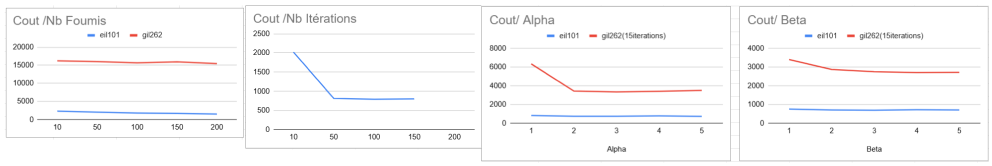

### **ACO AVEC ELITISME**

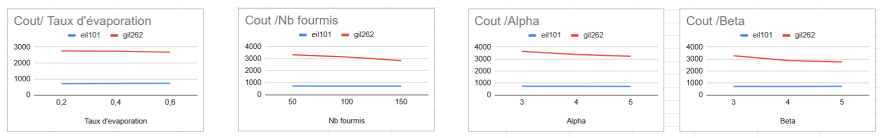

A partir de ces tests nous avons constaté que:
  - En augmentant le nombre de fourmis, la qualité de la solution s'améliore, cependant, cette amélioration est proportionnelle au temps d'exécution.
 - La meme chose pour le nombre d'iterations.
Conclusion: Choisir un compromis entre les 2 pour nombre de villes <= 100  -> 75/100 fourmis , 50 iterations
  - Valeur initale de pheromone entre 0,1-0,5 donne des meilleures resultats
  - Alpha = 5 Beta = 3
  - Q n'ameliore pas vraiment la solution donc on garde Q=1
  - Lorsque le taux d'amélioration est faible, les résultats sont meilleurs, notamment dans la plage de valeurs entre 0,2 et 0,4.

### **ACO MMAS**

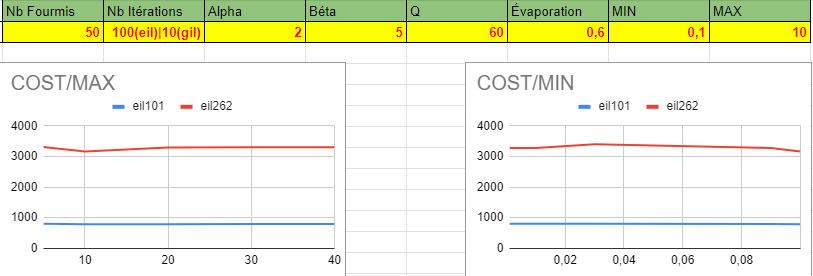

Cela réprésente le résultat (Détermination des valeurs finales) des tests de comparaison effectuée sur les différents paramètres de MMAS qui sont :


1.   ***Nombre de fourmis :*** qui explore l'espace de recherche.
2.   ***Nombre d'itérations :*** pour raffiner la solution.
3.   ***Alpha***
4.   ***Béta***
5.   ***Q :*** la quantité de phéromone déposée par chaque fourmi.
6.   ***Tau d'évaporation :*** qui affecte la diminution progressive de la phéromone.
7.   ***MIN***
8.   ***MAX***

Les paramètres MIN et MAX jouent un rôle crucial dans le contrôle de l'évolution des pistes de phéromone au fil des itérations ainsi qu'à l'optimisation de l'algorithme. Car en limitant l'amplitude des changements des pistes de phéromone, les valeurs minimales et maximales assurent la stabilité de la recherche, évitant ainsi une exploration inefficace ou une convergence prématurée vers une solution sous-optimale. `Cela favorise un équilibre entre l'exploration de nouvelles solutions et l'exploitation des solutions déjà trouvées.`

Best Cost pour :
 `eil101 : 787`
`gil262 : 3162`

Exact Cost pour :
 `eil101 : 629`
`gil262 : 2378`


### **AG avect 2OPT**



> **Une variation des paramétres de l'algorithle avant et apres avoir fixé les paramétres pour ameloirer kes performances**




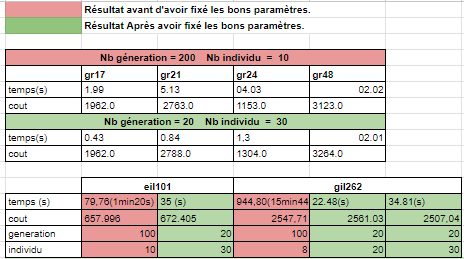


 **Test sur la base de données :eil101**











> **Variation de nombre de génerations:**




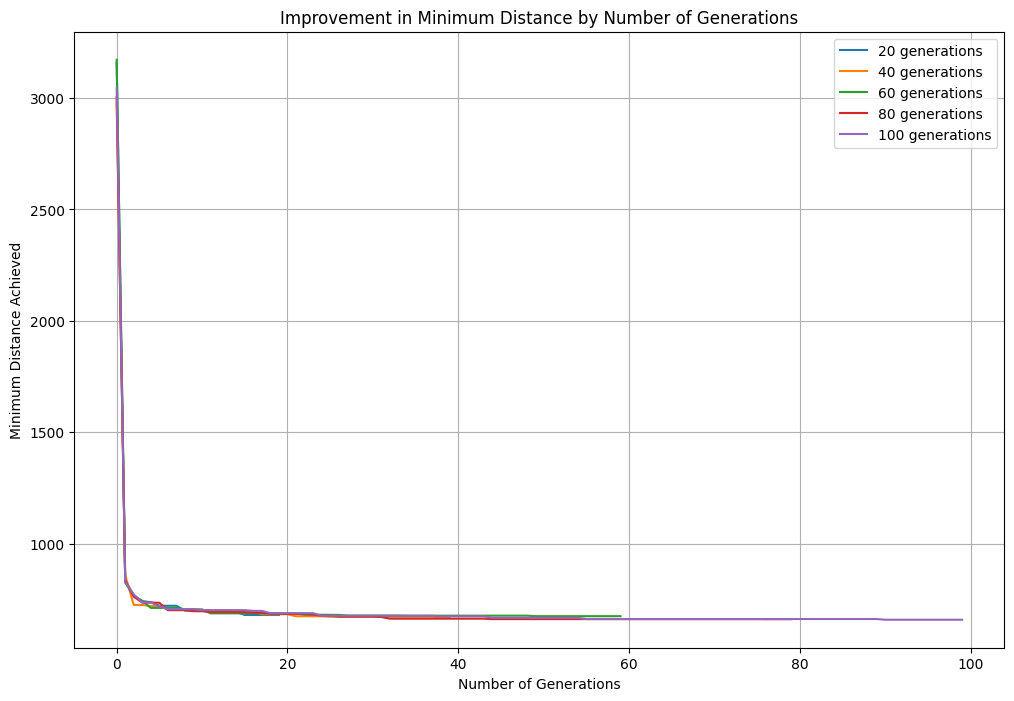




> **Variation sur le nombre des individus**



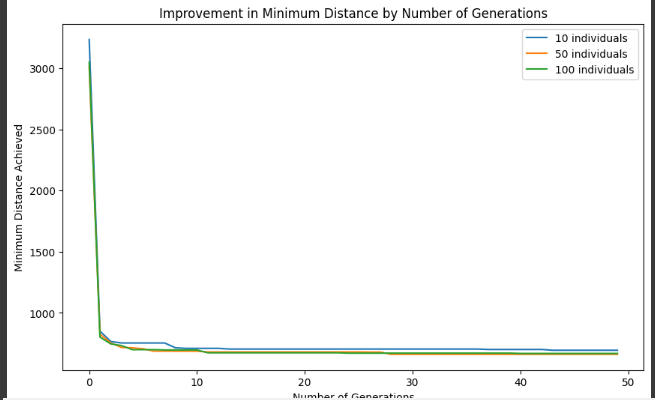

 **Test sur la base de données :gr96**




> **Variation de nombre de génerations:**

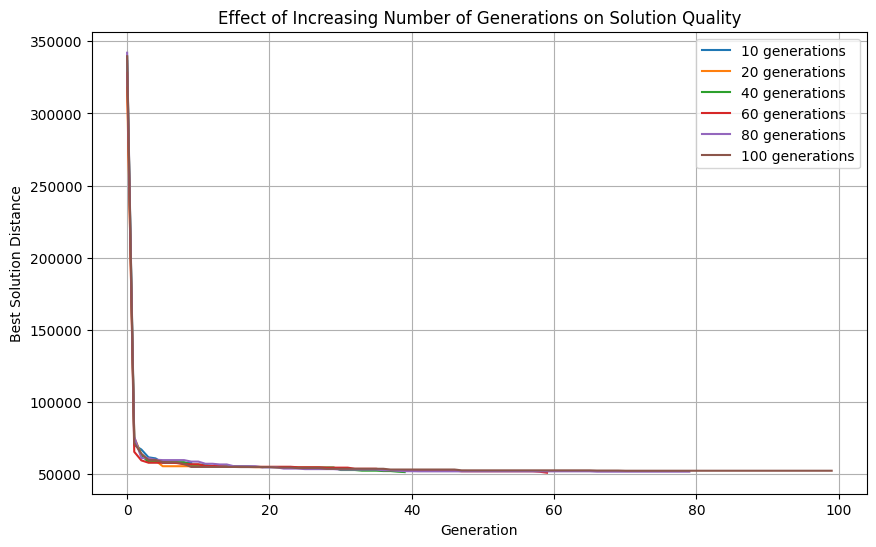

> **Variation sur le nombre des individus**
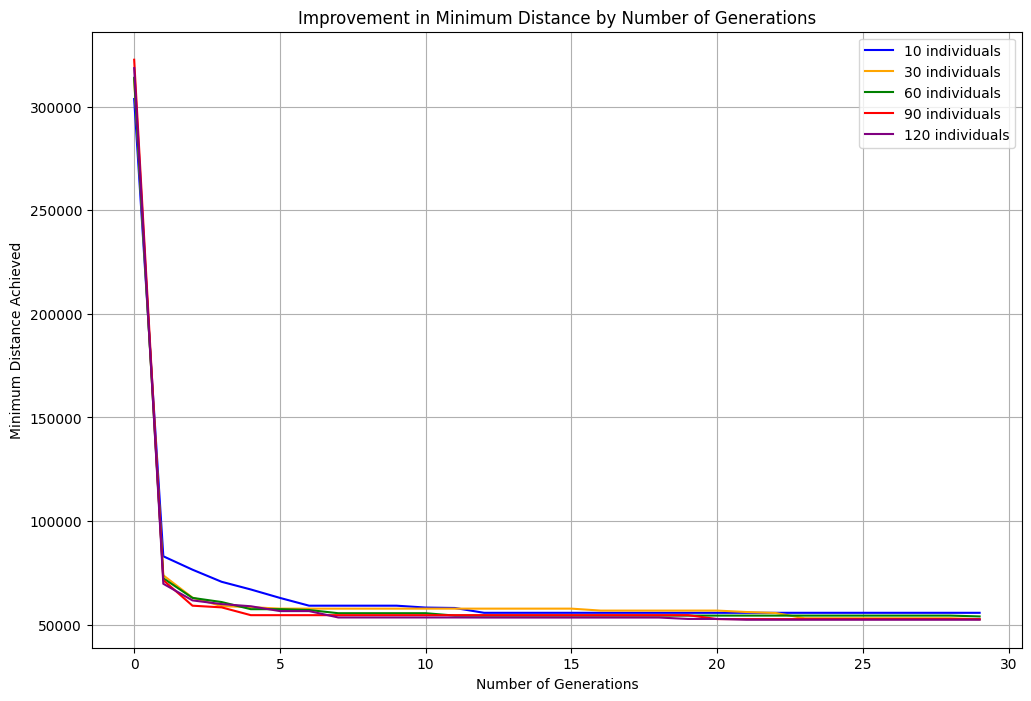

**Conclusion :**

 30 individus et 20 générations dans un algorithme génétique
pour le problème du voyageur de commerce,
nous pouvons atteindre un équilibre efficace entre diversité des solutions et rapidité de convergence.
